# Sentiment Analysis Project
This notebook focuses on sentiment analysis in the hospitality domain. The goal is to preprocess text data, extract features, and build models to classify sentiments.

## Importing Libraries
We start by importing the necessary libraries for data manipulation, text preprocessing, and machine learning. Each library serves a specific purpose, such as handling data (pandas), numerical operations (numpy), and text processing (nltk).

In [2]:
# Importing necessary libraries
import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation
import random  # for shuffling the data
import nltk
import re  # for handling regular expressions

from nltk.stem import WordNetLemmatizer  # for lemmatizing words
from nltk.corpus import stopwords  # for stop word removal
from nltk.tokenize import word_tokenize  # for tokenizing sentences into words

# Downloading necessary NLTK resources
nltk.download('stopwords')  # List of common stop words in English
nltk.download('punkt')  # Pre-trained tokenizer models
nltk.download('wordnet')  # WordNet lemmatizer dataset
nltk.download('punkt_tab')  # Downloads the 'punkt' tokenizer table used for tokenization of text into sentences or words

# Libraries for text feature extraction and model training
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text into numerical features (TF-IDF)
from sklearn.linear_model import LogisticRegression  # Logistic regression for classification
from sklearn.svm import LinearSVC  # Support Vector Machines for classification

# Libraries for model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # For model evaluation metrics
from sklearn.model_selection import KFold, cross_val_score  # For cross-validation
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zeal.v/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/zeal.v/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/zeal.v/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/zeal.v/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Additional Libraries
Here, we import libraries for visualization (matplotlib, seaborn) and environment variable management (dotenv). These libraries help in creating plots and securely managing file paths.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

## Loading Data
We use the `dotenv` library to load environment variables and securely access the file path for the dataset. The dataset is then loaded into a pandas DataFrame for analysis.

In [4]:
# Load environment variables
load_dotenv()

# Get the file path from the .env file
file_path = os.getenv('FILE_PATH')

# Load the .tsv file
df = pd.read_csv(file_path, sep='\t')

# Display the first few rows
print(df.head())

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


## Data Overview
The `info()` method provides a summary of the dataset, including column names, data types, and non-null counts. This helps in understanding the structure of the data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


## Text Preprocessing
Text preprocessing is a crucial step in NLP. It involves cleaning and transforming text data into a format suitable for analysis. The steps include converting text to lowercase, tokenization, removing stopwords, and punctuation.

In [6]:
# preprocessing function
def preprocess_text(doc):
    # Convert to lowercase
    doc = doc.lower()
    
    # Tokenize the text
    tokens = nltk.word_tokenize(doc)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]
    
    # Remove punctuation
    tokens = [w.translate(str.maketrans('', '', string.punctuation)) for w in tokens]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    

    tokens = list(set(tokens))
    
    # Join tokens back into a single string
    return ' '.join(tokens)

## Applying Preprocessing
The preprocessing function is applied to the 'Review' column to create a new column 'text_processed'. This column contains the cleaned and tokenized text data.

In [7]:
import string # Import the string module for handling punctuation

# Apply the preprocessing function to the 'Review' column
df['text_processed'] = df['Review'].apply(preprocess_text)

# Display the first few rows of the updated DataFrame
print(df[['Review', 'text_processed']].head())

                                              Review  \
0                           Wow... Loved this place.   
1                                 Crust is not good.   
2          Not tasty and the texture was just nasty.   
3  Stopped by during the late May bank holiday of...   
4  The selection on the menu was great and so wer...   

                                      text_processed  
0                                   wow  loved place  
1                                        good  crust  
2                                texture nasty tasty  
3  late  holiday rick recommendation may loved ba...  
4                         price menu great selection  


In [8]:
df['Review'].head()

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
Name: Review, dtype: object

In [9]:
df['text_processed'].head()

0                                     wow  loved place
1                                          good  crust
2                                  texture nasty tasty
3    late  holiday rick recommendation may loved ba...
4                           price menu great selection
Name: text_processed, dtype: object

## Project Overview
This project aims to analyze customer reviews in the restaurant industry to understand sentiment and improve service quality. By leveraging machine learning, we will classify reviews as positive or negative and extract actionable insights.

## Dataset Details
The dataset contains two columns:
- **Review**: The text of the customer review.
- **Liked**: A binary label indicating sentiment (1 for positive, 0 for negative).

## Exploratory Data Analysis (EDA)
We will explore the dataset to identify patterns and insights, such as:
- Review length and its correlation with sentiment.
- Frequent keywords in positive and negative reviews.
- Mixed sentiments in reviews.

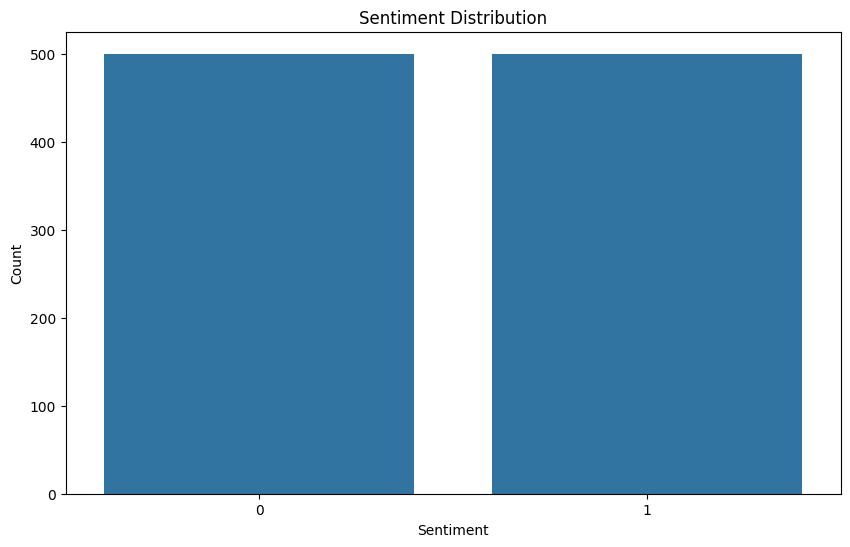

In [10]:
# Analyze sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Liked')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

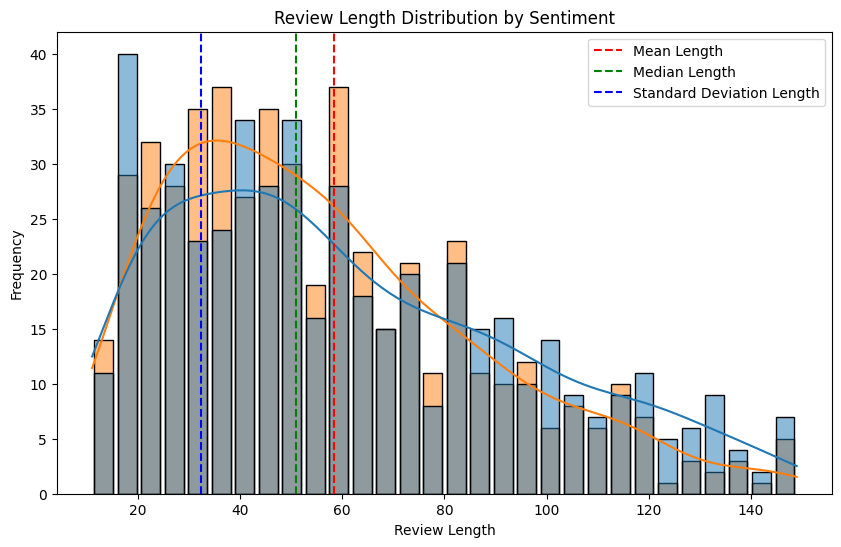

In [11]:
# Analyze review lengths
df['review_length'] = df['Review'].apply(len)  # len counts characters
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', hue='Liked', bins=30, kde=True, shrink=0.8)  # Use shrink to add space between bins
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.axvline(df['review_length'].mean(), color='red', linestyle='--', label='Mean Length')  # Add a vertical line for mean length
plt.axvline(df['review_length'].median(), color='green', linestyle='--', label='Median Length')  # Add a vertical line for median length
plt.axvline(df['review_length'].std(), color='blue', linestyle='--', label='Standard Deviation Length')  # Add a vertical line for standard deviation length
plt.legend()
plt.show()

In [12]:
# Summary statistics for review lengths 
df['review_length'].describe()
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())
# Drop duplicates
df.drop_duplicates(inplace=True)
# Check for duplicates again
print("Number of duplicate rows after dropping:", df.duplicated().sum())
# Check for class imbalance
print("Class distribution:")
print(df['Liked'].value_counts(normalize=True))

Missing values in each column:
Review            0
Liked             0
text_processed    0
review_length     0
dtype: int64
Number of duplicate rows: 4
Number of duplicate rows after dropping: 0
Class distribution:
Liked
1    0.501004
0    0.498996
Name: proportion, dtype: float64


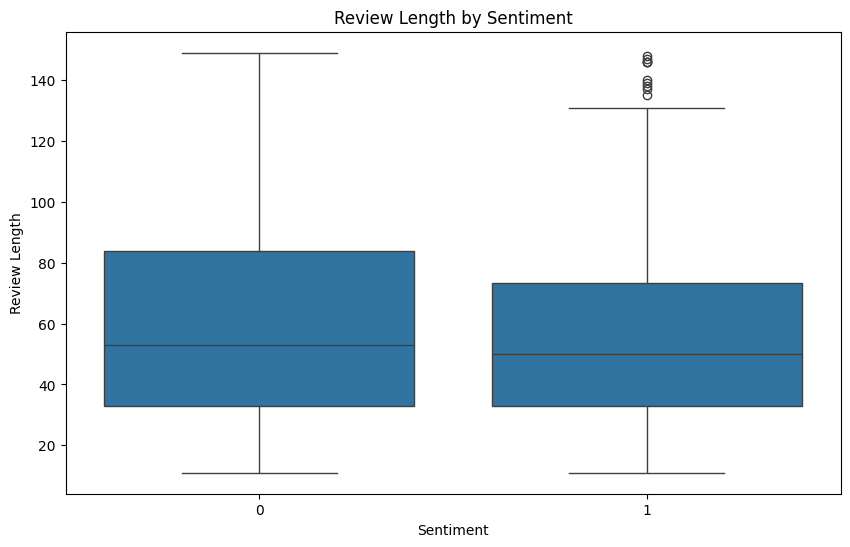

In [13]:
# Analyze review lengths by sentiment with boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Liked', y='review_length')
plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()

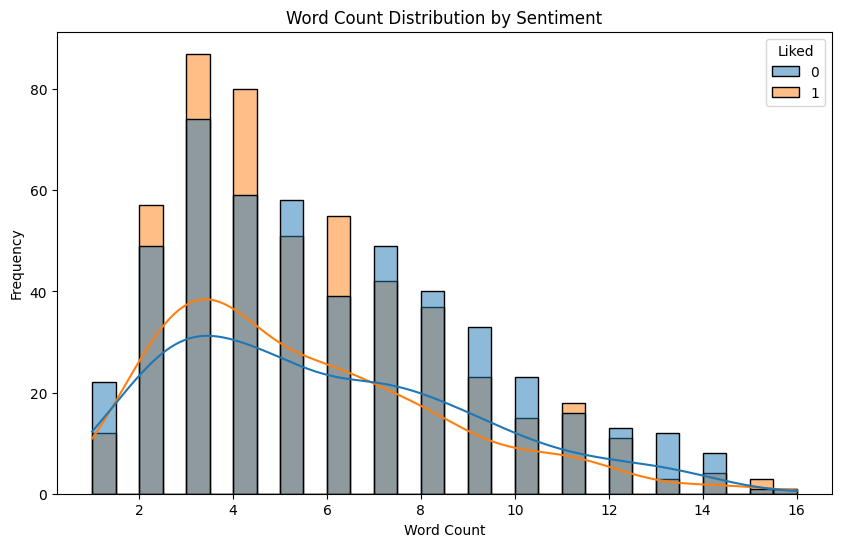

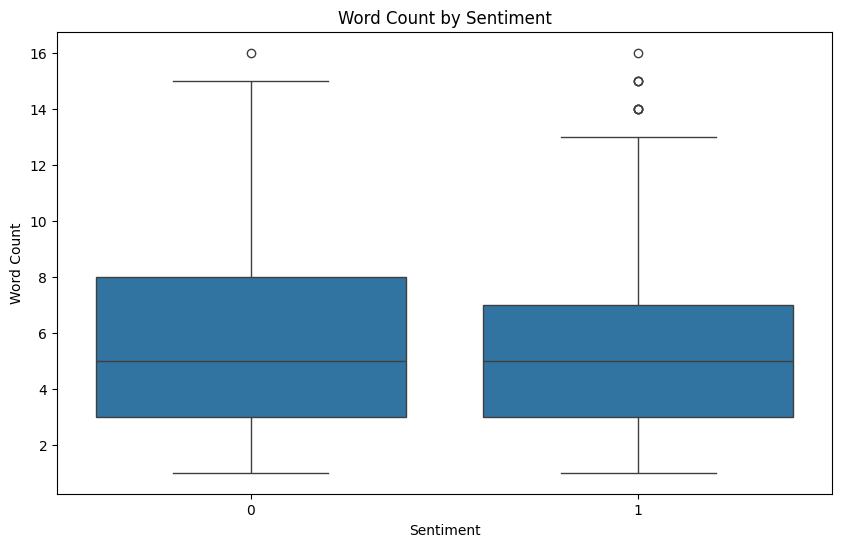

In [ ]:
# Analyze word count
df['word_count'] = df['text_processed'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='word_count', hue='Liked', bins=30, kde=True)
plt.title('Word Count Distribution by Sentiment')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()
# Analyze word count by sentiment with boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Liked', y='word_count')
plt.title('Word Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()

#### Following code snippet uses the Counter class from Python's collections module to count the frequency of words in a collection of positive reviews. Here's a breakdown of its functionality:

- Joining Positive Reviews: The join method combines all the strings in the positive_reviews collection into a single string, with each review separated by a space. This creates a unified text representation of all positive reviews.

- Splitting into Words: The split method then breaks this unified string into individual words based on spaces. This results in a list of words from all the positive reviews.

- Counting Word Frequencies: The Counter class takes this list of words as input and creates a dictionary-like object where the keys are unique words, and the values are their respective counts. This allows for quick access to the frequency of any word in the positive reviews.

- This approach is particularly useful for identifying the most common words in positive reviews, which can provide insights into recurring themes or sentiments expressed by customers. For example, frequently occurring words like "delicious," "friendly," or "excellent" might highlight aspects of the service or product that customers appreciate the most.

In [16]:
# Extract frequent keywords
from collections import Counter
positive_reviews = df[df['Liked'] == 1]['text_processed']
negative_reviews = df[df['Liked'] == 0]['text_processed']

positive_words = Counter(' '.join(positive_reviews).split())
negative_words = Counter(' '.join(negative_reviews).split())

print('Most common words in positive reviews:', positive_words.most_common(10))
print('Most common words in negative reviews:', negative_words.most_common(10))

Most common words in positive reviews: [('good', 69), ('great', 64), ('food', 59), ('place', 56), ('service', 46), ('time', 25), ('friendly', 24), ('delicious', 23), ('amazing', 22), ('nice', 22)]
Most common words in negative reviews: [('nt', 73), ('food', 61), ('place', 49), ('back', 37), ('service', 37), ('like', 29), ('time', 28), ('go', 26), ('would', 24), ('good', 22)]


## Feature Engineering
In this section, we will use TF-IDF to convert text data into numerical features. TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure that evaluates the importance of a word in a document relative to a collection of documents.

In [ ]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english')

# Fit and transform the 'text_processed' column
X_tfidf = tfidf_vectorizer.fit_transform(df['text_processed'])

# Convert the TF-IDF matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
'''Dense Array: The toarray() method converts the sparse matrix into a dense NumPy array.
In this format, all elements (including zeros) are explicitly stored, 
making it suitable for use in pandas DataFrames or other tools that require dense data.'''

# Display the first few rows of the TF-IDF DataFrame
print(tfidf_df.head())

    10   12   20   30   35   40  absolutely  ago  amazing  ambiance  ...  \
0  0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0      0.0       0.0  ...   
1  0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0      0.0       0.0  ...   
2  0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0      0.0       0.0  ...   
3  0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0      0.0       0.0  ...   
4  0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0      0.0       0.0  ...   

   word  work  world  worst  worth      wow  wrong  year  yummy  zero  
0   0.0   0.0    0.0    0.0    0.0  0.71411    0.0   0.0    0.0   0.0  
1   0.0   0.0    0.0    0.0    0.0  0.00000    0.0   0.0    0.0   0.0  
2   0.0   0.0    0.0    0.0    0.0  0.00000    0.0   0.0    0.0   0.0  
3   0.0   0.0    0.0    0.0    0.0  0.00000    0.0   0.0    0.0   0.0  
4   0.0   0.0    0.0    0.0    0.0  0.00000    0.0   0.0    0.0   0.0  

[5 rows x 500 columns]


## Train-Test Split
To evaluate the performance of our models, we split the dataset into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data.

In [18]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
y = df['Liked']
X = X_tfidf

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

Training set size: 796 samples
Testing set size: 200 samples


## Model Training
We will train two models: Logistic Regression and Support Vector Machine (SVM). These models are commonly used for text classification tasks.

In [19]:
# Train Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Train Support Vector Machine
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

LinearSVC()

## Model Evaluation
We evaluate the models using the testing set. Metrics such as accuracy, precision, recall, and F1-score will be calculated to assess the performance of each model.

In [20]:
# Evaluate Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)
print('Logistic Regression Performance:')
print(classification_report(y_test, y_pred_logistic))

# Evaluate Support Vector Machine
y_pred_svm = svm_model.predict(X_test)
print('SVM Performance:')
print(classification_report(y_test, y_pred_svm))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       106
           1       0.80      0.70      0.75        94

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200

SVM Performance:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       106
           1       0.79      0.68      0.73        94

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



## Business Application: Extracting Insights
In this section, we will analyze the sentiment classification results to extract actionable insights. These insights can help improve customer satisfaction by addressing common issues and enhancing positive aspects.

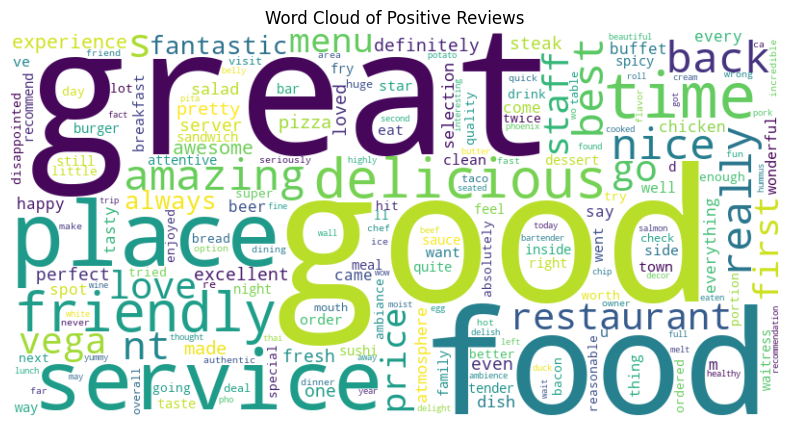

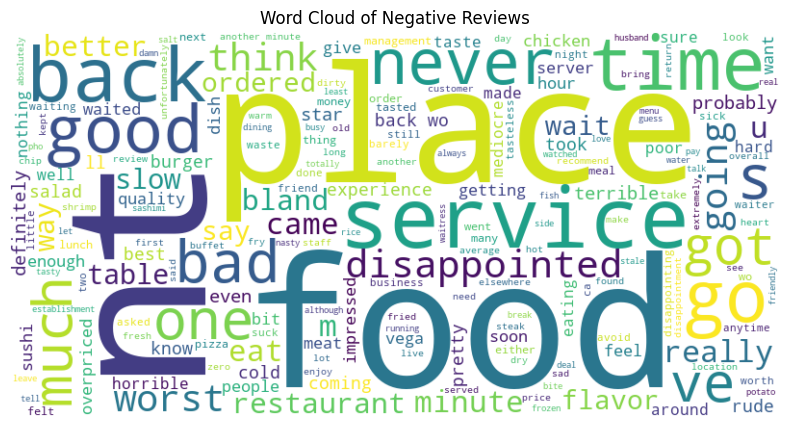

In [21]:
#!pip install wordcloud
from wordcloud import WordCloud

# Generate word clouds for positive and negative reviews
positive_text = ' '.join(df[df['Liked'] == 1]['text_processed'])
negative_text = ' '.join(df[df['Liked'] == 0]['text_processed'])

# Positive reviews word cloud
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()

# Negative reviews word cloud
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')
plt.show()

In [22]:
print(df.head())

                                              Review  Liked  \
0                           Wow... Loved this place.      1   
1                                 Crust is not good.      0   
2          Not tasty and the texture was just nasty.      0   
3  Stopped by during the late May bank holiday of...      1   
4  The selection on the menu was great and so wer...      1   

                                      text_processed  review_length  \
0                                   wow  loved place             24   
1                                        good  crust             18   
2                                texture nasty tasty             41   
3  late  holiday rick recommendation may loved ba...             87   
4                         price menu great selection             59   

   unique_word_count  word_count  
0                  3           3  
1                  2           2  
2                  3           3  
3                  9           9  
4                  

In [23]:
# Display a few positive reviews before joining
print(df[df['Liked'] == 1]['text_processed'].head())

# Display a few negative reviews before joining
print(df[df['Liked'] == 0]['text_processed'].head())

0                                     wow  loved place
3    late  holiday rick recommendation may loved ba...
4                           price menu great selection
8                                            great fry
9                                          touch great
Name: text_processed, dtype: object
1                                          good  crust
2                                  texture nasty tasty
5                          want angry pho damn getting
6                              taste fresh honeslty nt
7    made  rubber ahead warmer time tell could pota...
Name: text_processed, dtype: object


In [24]:
# Display the first 500 characters of the positive reviews string
print(positive_text[:500])  

wow  loved place late  holiday rick recommendation may loved bank stopped steve  price menu great selection  great fry  touch great service  prompt  tried chicken cape cod cranberry mmmm ravoli  recommended highly food  amazing service  cute also  less beautiful interior care could  performed  stuff velvet right good s ohhh cake red  wall mexican street friendly great staff taco hole  fry beer deal combo decent also 23 burger like  happier accident place could found  overall place lot like  inex


## Actionable Recommendations
Based on the analysis of positive and negative reviews, we can suggest the following improvements:
1. **Menu Adjustments**: Identify dishes frequently mentioned in negative reviews and consider improving their quality or replacing them.
2. **Staff Training**: Address recurring complaints about service by providing targeted training to staff.
3. **Service Optimizations**: Enhance aspects of the service that customers appreciate in positive reviews to further delight them.

## Expanded Explanation of Model Evaluation Metrics
To deeply understand how our models perform, let's break down the evaluation metrics in more detail:

### 1. Accuracy
- **What it measures**: Accuracy tells us the percentage of total predictions (both positive and negative) that the model got correct.
- **Formula**: Accuracy = (True Positives + True Negatives) / Total Samples
- **When it's useful**: Accuracy is a good metric when the dataset is balanced, meaning there are roughly equal numbers of positive and negative reviews.
- **Limitations**: If the dataset is imbalanced (e.g., 90% positive reviews and 10% negative), a model that always predicts 'positive' will have high accuracy but will fail to identify negative reviews.

### 2. Precision
- **What it measures**: Precision focuses on the quality of positive predictions. It answers the question: 'Of all the reviews the model predicted as positive, how many were actually positive?'
- **Formula**: Precision = True Positives / (True Positives + False Positives)
- **When it's useful**: Precision is important when false positives are costly. For example, in a business setting, falsely labeling a negative review as positive might lead to ignoring critical customer feedback.

### 3. Recall (Sensitivity or True Positive Rate)
- **What it measures**: Recall focuses on the model's ability to find all positive reviews. It answers the question: 'Of all the actual positive reviews, how many did the model correctly identify?'
- **Formula**: Recall = True Positives / (True Positives + False Negatives)
- **When it's useful**: Recall is crucial when missing positive reviews is costly. For example, if positive reviews are used to identify satisfied customers for loyalty programs, missing them could lead to lost opportunities.

### 4. F1-Score
- **What it measures**: The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances the trade-off between precision and recall.
- **Formula**: F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
- **When it's useful**: The F1-score is particularly useful when the dataset is imbalanced, as it considers both false positives and false negatives.

### Example to Illustrate Metrics
Imagine we have 100 reviews, 80 positive and 20 negative. The model predicts 85 as positive and 15 as negative. Out of the 85 positive predictions, 75 are correct (true positives), and 10 are incorrect (false positives). Out of the 15 negative predictions, 10 are correct (true negatives), and 5 are incorrect (false negatives).

- **Accuracy**: (75 + 10) / 100 = 85%
- **Precision**: 75 / (75 + 10) = 88.2%
- **Recall**: 75 / (75 + 5) = 93.8%
- **F1-Score**: 2 * (0.882 * 0.938) / (0.882 + 0.938) ≈ 91%

### Observations for Logistic Regression and SVM
- **Logistic Regression**: This model is simple and interpretable. It works well when the relationship between features and the target is linear. If its precision is higher than recall, it means the model is conservative in predicting positive reviews, avoiding false positives but potentially missing some true positives.
- **SVM**: Support Vector Machines are powerful for high-dimensional data. If its recall is higher than precision, it means the model is aggressive in predicting positive reviews, capturing more true positives but at the cost of more false positives.

By comparing these metrics, we can decide which model aligns better with the business goals. For example, if identifying all positive reviews is critical, we might prioritize recall over precision.

## Mathematical Formulas in LaTeX
To better understand the evaluation metrics, here are the mathematical formulas written in LaTeX:

### 1. Accuracy
$$\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Samples}}$$

### 2. Precision
$$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

### 3. Recall (Sensitivity or True Positive Rate)
$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

### 4. F1-Score
$$\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

These formulas provide a clear mathematical representation of how each metric is calculated.